# 2.2 - Linear Predictive Coding

<img style="float: right; margin:5px 0px 0px 10px" src="img/2-title.jpg" width="500">
Das "Linear Predictive Coding" (LPC) ist ein Verfahren, das hauptsächlich in der Audiosignalverarbeitung und Sprachverarbeitung verwendet wird, um die Spektralhüllkurve eines digitalen Sprachsignals in komprimierter Form unter Verwendung der Informationen eines linearen Vorhersagemodells darzustellen. Es ist eine der leistungsstärksten Sprachanalysetechniken und eine der nützlichsten Methoden zum Codieren von Sprache in guter Qualität mit einer niedrigen Bitrate und liefert hochgenaue Schätzungen von Sprachparametern. LPC ist die am weitesten verbreitete Methode in der Sprachcodierung und Sprachsynthese.

Thematisch wird LPC erst in Thema5-Hüllkurven behandelt, da sich mit LPC aber im Zuge der Bestimmung der Einhüllenden auch die Systemfunktion des z.B. Vokaltraktes (d.h. des dazugehörige _Synthesfilters_) schätzen lassen, wird sie in den Notebooks an dieser Stelle eingeführt. LPC unterscheidet sich aber grundlegend von dem Vorgehen der Messung der Übertragungsfunktion, wie es am Beispiel des Sweeps im Notebook 2.1 behandelt wurde.


## Inhalt  
<table style="width:256px; border: 1px solid black; display: inline-block">
    <tr>
        <td style="text-align:right"><img src="img/2-1.png" style="float:left"></td>
        <td style="text-align:left" width=128px>
            <a style="color:black; font-size:12px; font-weight:bold; text-decoration:none" href='#1'>
                1. Grundlagen
            </a>
        </td>
    </tr>    
    <tr>
        <td  style="text-align:right" width=64px><img src="img/2-2.png" style="float:left"></td>
        <td style="text-align:left" width=256px>
            <a style="color:black; font-size:12px; font-weight:bold; text-decoration:none" href='#2'>
                2. Anwendungsbeispiel
            </a>
        </td>
    </tr>  
</table>

----

<a id='1'></a>
<div>
    <img src="img/2-1.png" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        1. Grundlagen
    </h2>
</div>

<img style="float:top; margin:5px 0px 0px 10px" src="img/Quelle-Filter-Modell.jpg" width="800">

Die artikulatorische Sprachsynthese (anders als z.B. die datengestützte Sprachsynthese, wie sie in sämtlichen Sprachassistenten angewendet wird) basiert auf der sog. Quelle-Filter-Theorie, welche davon ausgeht, dass die Sprachproduktion in zwei Prozesse unterteilt werden kann, die unabhängig voneinander sind: die Erzeugung eines Anregungssignales und die anschließende Filterung dieses Anregungssignales. Unabhängig bedeutet in diesem Kontext, dass der nachgeschaltete Filterprozess das Anregungssignal nicht verändert, also keine Rückkopplung entsteht.

Vereinfacht dargestellt erzeugen bei der Sprachproduktion die Glottis und die Stimmlippen unter Anregung eines Luftstromes das Anregungssignal, welches vom daraufffolgenden Vokaltrakt gefiltert wird. Das Anregungssignal kann dabei stimmhaft sein (d.h. es besitzt eine Grundperiode), stimmlos (Rauschrignal) oder eine Mischung aus Beidem. Wenn sich die Stimmlippen in einem vokalisierten Zustand befinden (Vibration der Stimmlippen), werden stimmhafte Laute (zum Beispiel Vokale) erzeugt. Wenn sich die Stimmbänder in einem "stillen" Zustand befinden, werden stimmlose Laute (zum Beispiel Konsonanten) erzeugt. 

LPC bietet die Möglichkeit, die Systemfunktion des Vokaltraktes zu schätzen, ohne das Anregungssignal zu kennen.

#### Grundidee:   
Die Grundidee der LPC ist zunächst generell, dass die einzelnen Abtastwerte eines linear gefilerten Ausgangssignals $y(k)$ (in Falle der Sprachproduktion das abgestrahle Sprachschallsignal) nicht unabhängig voneinander sind. Stattdessen lässt sich jeder Abtastwert $y(k)$ aus einer Linearkombination endlich vielen vorangegangenen Abtastwerten annähern:
\begin{equation}
\hat{y}(k)=\sum_{i=1}^{N}a_{i}y(k-i)
\end{equation}
Die Gewichtungsfaktoren $a_i$ heißen _Prädiktorkoeffizienten_.

Für jeden Abtastwert wird damit ein gewisser Prädiktionsfehler $e(k)$ gemacht:
\begin{equation}
e(k)=y(k)-\hat{y}(k)=y(k)-\sum_{i=1}^{N}a_{i}y(k-i)
\end{equation}

Die $a_{i}$ werden geschätzt, indem der mittlere quadratische Fehler (der sog. MSE, _mean squared error_) im betrachteten Signalabschnitt minimiert wird. 

Die Gleichung für $y(k)$ entspricht formal der Rekursionsgleichung für einen IIR-Allpol-Filter $H(z)$, wobei das Fehlersignal als (mit der Verstärkung $G$ skaliertes) Eingangssignal $x(k)$ betrachtet werden kann:
\begin{equation}
y(k)=e(k)+\sum_{i=1}^{N}a_{i}y(k-i)=Gx(k)+\sum_{i=1}^{N}a_{i}y(k-i)
\end{equation}

Die Systemfunktion ist somit
\begin{equation}
H(z)=\frac{Y(z)}{E(z)}=\frac{1}{1-\sum_{i=1}^{N}a_{i}z^{-i}}
\end{equation}

Dieser Filter ist der sogenannte __LPC-Synthesefilter__. Der Amplitudengang des Synthesefilters entspricht bei einem weißen Anregungsspektrum der
Hüllkurve im Frequenzbereich.

Umgekehrt lässt sich das Fehlersignal $e(k)$ durch die Filterung von $y(k)$ mit dem inversen Filter $A(z) = 1/H(z)$ bestimmen. Dieser Filter wird als __Analysefilter__ bezeichnet.

<img style="float:top; margin:5px 0px 0px 10px" src="img/lpc.png" width="800">

----

<a id='2'></a>
<div>
    <img src="img/2-2.png" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        2.  Anwendungsbeispiel
    </h2>
</div>

LPC findet, wie bereits erwähnt, breite Anwendung in der Spracherkennung, Sprachsynthese und Sprachkompression. Als Beispiel soll hier die lineare Prädiktion zur Formanterkennung verwendet werden, d.h., um die Formantfrequenzen (Resonanzfrequenzen) des Vokaltrakts zu schätzen. Im Quelle-Filter Sprachsignalmodell entsprechen die Formantfrequenzen den komplexen Polpaaren der Übertragungsfunktion. 

Ausgehend von einem kurzen Abschnitt des Signals werden die Prädiktorkoeffizienten geschätzt, welche wiederum die Filterkoeffizienten $a_i$ des Nennerpolynoms darstellen. Jede komplexe Wurzel der diskreten Systemfunktion des Synthesefilters lässt sich bekanntermaßen auch über 
\begin{equation}
p_{i}=r_{i}e^{j \Omega_{i}},\qquad r_i=\sqrt{real(p_i)^2+imag(p_i)^2},\qquad \Omega_i = atan\left(\frac{imag(p_i)}{real(p_i)}\right)
\end{equation}
darstellen, d.h. die geschätzten Formantfrequenzen $f_i$ sind 
\begin{equation}
f_i = \frac{\Omega_i\cdot f_s}{2\pi},
\end{equation}
Wobei nur die Frequenzen mit  positivem Vorzeichen in Frage kommen. Außerdem müssen die Formantfrequenzen überhalb der Grundfrequenz liegen, d.h. eine zusätzliche Bedingung ist $f_i >\approx$ 90-100 Hz.

Importieren Sie zuerst die verwendeten externen Module:

In [ ]:
'''
Import externer Module
'''
# ToDo: Importieren Sie:
#    - numpy mit dem Alias np,
#    - simpleaudio mit dem Alias sa,
#    - Das Modul pyplot aus der Bibliothek matplotlib mit dem Alias plt,
#    - scipy
#    - Das Modul wavfile aus der Bibliothek scipy.io
#    - librosa
#    - Das Modul interact_manual aus der Bibliothek ipywidgets in den globalen Namenraum.

In [1]:
'''
Import externer Module
'''
# Lösung

import numpy as np
import simpleaudio as sa
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from scipy import signal
import librosa
from ipywidgets import interact_manual

Nun laden Sie das Audiosignal `akustik.wav` in das Projekt und bestimmen Sie dessen Eigenschaften:

In [ ]:
'''
Audiosignal laden
'''

fs_Hz, audioSignal =  [..]          # ToDo: Laden Sie 'akustik.wav' mittels wavfile.read() in das Projekt
audioSignal = [..]                  # ToDo: Normalisierung von audioSignal
signalLength = [..]                 # ToDo: Länge des Audiosignals
T_s = (signalLength-1) / fs_Hz      # Zeit
t_s = [..]                          # ToDo: Erzeugen Sie ein Array mit den Abtastzeitpunkten mittels np.linspace() 
f_Hz = [..]                         # ToDo: Erzeugen Sie ein Array mit den Frequenzpunkten von [0-fs_Hz/2] mittels np.linspace()

print("Abtastrate : %d Hz, Signaldauer : %.2f s" %(fs_Hz, T_s))

In [2]:
'''
Audiosignal laden
'''

# Lösung
fs_Hz, audioSignal = wavfile.read('data/akustik.wav')   # Sample Rate, Audiosignal im Array-Form
audioSignal = audioSignal/np.max(np.abs(audioSignal))   # Normalisierung
signalLength = len(audioSignal)                         # Länge des Audiosignals
T_s = signalLength/fs_Hz - 1/fs_Hz                      # Zeit
t_s = np.linspace(0, T_s, signalLength)                 # Zeitbereich
f_Hz = np.linspace(0, fs_Hz/2, signalLength//2)         # Frequenzbereich

print("Abtastrate : %d Hz, Signaldauer : %.2f s" %(fs_Hz, T_s))

Abtastrate : 16000 Hz, Signaldauer : 3.76 s


Hören Sie sich nun das Array `audioSignal` an. Erstellen Sie dafür eine Funktion "play_audio", die mittels simpleaudio Zahlenarrays als Signal über die Lautsprecher ausgibt.

In [ ]:
'''
Definition der Funktion play_audio
'''
# ToDo: Erstellen sie eine Funktion, die das Eingangsarray in ein INT16 verwandelt und dann via simpleaudio ausgibt.
def play_audio( [..] ):
    [..]

In [3]:
'''
Definition der Funktion play_audio
'''

# Lösung
def play_audio(acoustic_signal_i):
    sound = (acoustic_signal_i*(2**15-1)/np.max(np.abs(acoustic_signal_i))).astype(np.int16)
    play_obj = sa.play_buffer(sound, 1, 2, int(fs_Hz))
    play_obj.wait_done()

In [ ]:
'''
Audioausgabe
'''
[..] # ToDo: wenden Sie die Funktion "play_audio" an, um sich "audioSignal" anzuhören.

In [4]:
'''
Audioausgabe
'''
# Lösung
play_audio(audioSignal)

Zur Bestimmung der Segmentlänge ist ein Kompromiss zwischen zwei gewünschten Eigenschaften zu finden:
 1. Das Segment soll so klein wie möglich sein, um das Spektrum an einem Zeitpunkt zu erhalten,
 2. Das Segment soll so groß wie möglich sein, um das Spektrum invariant gegenüber der Lage der Gtrundperiode zu machen. 
 
Die Grundperiode des Signals liegt zwischen 8-12 ms. Als guten Kompromiss zwischen den beiden Eigenschaften hat sich die Segmentlänge von 32 ms erwiesen. Das hat auch den Vorteil, dass diese Länge bei einer Abtastrate von 16 kHz insgesamt 512 Elemente umfasst, welches eine optimale Größe bei der Anwendung der FFT bedeutet.

Schneiden Sie das Signal nun in ein 32 ms bzw. 512 Elemente langes Segment, in dem der Vokal /a/ gesagt wird (Startpunkt zum Beispiel bei 1,18 s), und berechnen Sie das Spektrum des /a/-Vokaltrakt:

In [ ]:
'''
Spektrum eines 32 ms langen /a/-Segments des Wortes „Akustik“
''' 
# Zeitintervall bestimmen
n_start =     [..]      # ToDo: Bestimmen Sie die Startsample-Nummer
n_end =    [..]         # ToDo: Bestimmen Sie die Endsample-Nummer

# Audiosignal segmentieren
t_aSegment_s = [..]  # ToDo: Segmentieren Sie das Zeitarray t_s auf das oben bestimmte Zeitintervall
a_segment =  [..]  # ToDo: Segmentieren Sie das Signalarray audioSignal auf das oben bestimmte Zeitintervall               

# Spektrum berechnen
n_fft = 512  # Länge von FFT
f_aSegment_Hz = np.linspace(0, fs_Hz/2, int(n_fft/2))   # Frequenzbereich
aSegment_fft = [..]  # ToDo: wenden Sie eine FFT an mittels scipy.fftpack.fft()
aSegment_fft_plot = np.abs(aSegment_fft[:len(f_aSegment_Hz)]) / int(n_fft/2)

# Graphische Darstellung 
plt.subplot(121)
plt.title('Audiosignal eines /a/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_aSegment_s, a_segment)

plt.subplot(122)
plt.title('Amplitudenfrequenzgang des /a/-Segments')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('log|X(f)|') 
plt.plot(f_aSegment_Hz, np.log(aSegment_fft_plot))

plt.gcf().set_size_inches(15, 5)
plt.show()

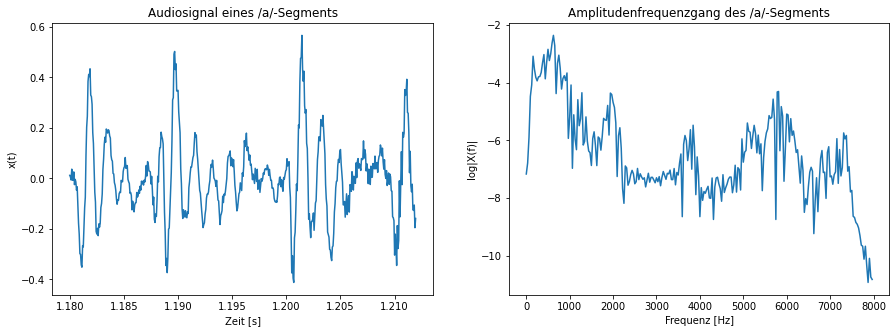

In [5]:
'''
Spektrum eines 32 ms langen /a/-Segments des Wortes „Akustik“
''' 
# Lösung
# Zeitintervall bestimmen
n_start = int(1.18 / T_s * signalLength)                # Startsample-Nummer
n_end = n_start + 512                                   # Endsample-Nummer
t_aSegment_s = t_s[n_start:n_end]

# Audiosignal segmentieren
a_segment = audioSignal[n_start:n_end]               

# Spektrum berechnen
n_fft = 512; # Länge von FFT
f_aSegment_Hz = np.linspace(0, fs_Hz-fs_Hz/2-fs_Hz/n_fft, int(n_fft/2))   # Frequenzbereich
aSegment_fft = scipy.fftpack.fft(a_segment, n_fft)
aSegment_fft_plot = np.abs(aSegment_fft[:len(f_aSegment_Hz)]) / int(n_fft/2)

# Graphische Darstellung 
plt.subplot(121)
plt.title('Audiosignal eines /a/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_aSegment_s, a_segment)

plt.subplot(122)
plt.title('Amplitudenfrequenzgang des /a/-Segments')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('log|X(f)|') 
plt.plot(f_aSegment_Hz, np.log(aSegment_fft_plot))

plt.gcf().set_size_inches(15, 5)
plt.show()

Die FFT geht von einer periodischen Fortführung des Signals aus. Beim Segmentieren des Signals entstehen dadurch Sprünge zwischen dem ersten und letzten Wert, die hochfrequente Anteile erzeugen, die im Signal eigentlich nicht vorhanden sind. Deshalb sollte das Signal vor der Verarbeitung gefenstert werden. Verwenden Sie dafür ein "Von-Hann-Fenster":

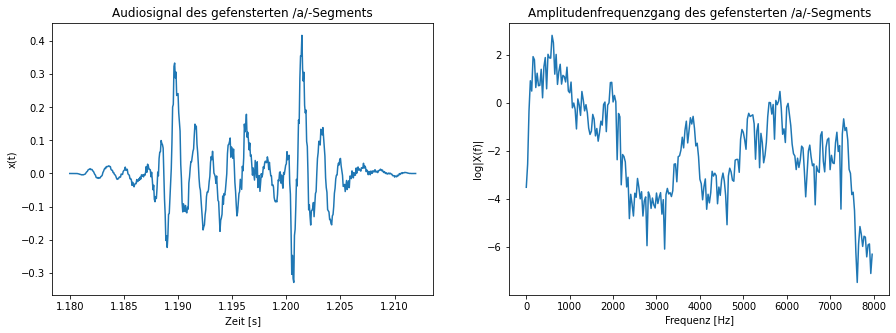

In [6]:
'''
Anwendung des von-Hann-Fensters auf das /a/-Segment
'''

# Audiosegment fenstern
a_segment_win = [..]    # ToDo: Fenstern des Arrays a_segment mit "signal.hann()"

# Spektrum des von-Hann-gefensterten Signals
aSegment_fft_win = [..]  # ToDo: wenden Sie eine FFT an mittels scipy.fftpack.fft()

# Graphische Darstellung
plt.subplot(121)
plt.title('Audiosignal des gefensterten /a/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_aSegment_s, a_segment_win)

plt.subplot(122)
plt.title('Amplitudenfrequenzgang des gefensterten /a/-Segments')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('log|X(f)|') 
plt.plot(f_aSegment_Hz, np.log(np.abs(aSegment_fft_win[:len(f_aSegment_Hz)])))

plt.gcf().set_size_inches(15, 5)
plt.show()

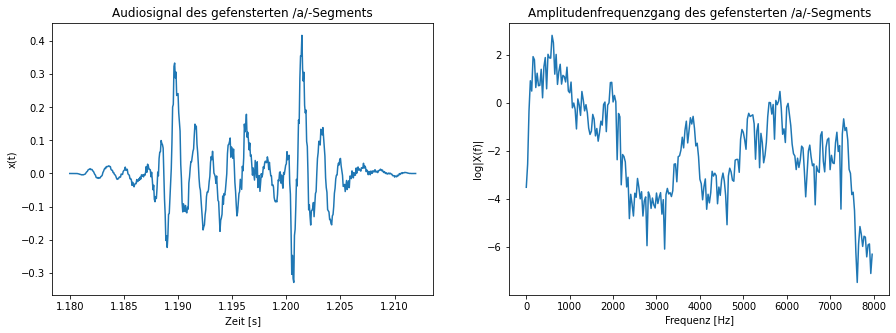

In [6]:
'''
Anwendung des von-Hann-Fensters auf das /a/-Segment
'''

# Lösung
# Audiosegment fenstern
a_segment_win = signal.hann(a_segment.size)*a_segment

# Spektrum des von-Hann-gefensterten Signals
aSegment_fft_win = scipy.fftpack.fft(a_segment_win, n_fft)

# Graphische Darstellung
plt.subplot(121)
plt.title('Audiosignal des gefensterten /a/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_aSegment_s, a_segment_win)

plt.subplot(122)
plt.title('Amplitudenfrequenzgang des gefensterten /a/-Segments')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('log|X(f)|') 
plt.plot(f_aSegment_Hz, np.log(np.abs(aSegment_fft_win[:len(f_aSegment_Hz)])))

plt.gcf().set_size_inches(15, 5)
plt.show()

Geben Sie sich nun das segmentierte Audiosignal `a_segment` aus. Da das Signal nur 32 ms lang ist, muss das Signal wiederholt werden. Definieren Sie deshalb dafür eine Funktion "repeat_audio", die das eingegebene Signal mehrfach hintereinander hängt (erwarten sie dabei keine schön klingendes Signal. Es soll lediglich demonstriert werden, dass eine Tendenz hörbar ist, um welchen Vokal es sich handelt).

In [ ]:
'''
Definition der Funktion repeat_audio
'''
# ToDo: Erstellen sie eine Funktion, die das eingegebene Array mehrfach hintereinanderhängen.
def repeat_audio( [..] ):
    [..]
    for i in range(0, 7):
        [..] = np.concatenate(( [..] ), axis = None)   # ToDo: eine Möglichkeit zum hintereinanderhängen des Signals
    
    # Optional: Audioausgabe mittels Boolscher Variable steuerbar 
    if [..] :
        [..]
        
    return [..]  # zusammengefügtes Array

In [7]:
'''
Definition der Funktion repeat_audio
'''

# Lösung
def repeat_audio(acoustic_signal_i, signal_output_i=False):
    sound = acoustic_signal_i
    for i in range(0, 7):
        sound = np.concatenate((sound,sound), axis = None)   

    # Ausgabe
    if signal_output_i == True:
        sound = (sound*(2**15-1)/np.max(np.abs(sound))).astype(np.int16)
        play_obj = sa.play_buffer(sound, 1, 2, int(fs_Hz))
        play_obj.wait_done()
    return sound

 Hören Sie Sich sowohl das unbearbeitete als auch das gefensterte Segment an: 

In [ ]:
'''
Audioausgabe
'''
a_segment_rep = [..] # ToDo: wenden Sie die Funktionen "repeat_audio" und "play_audio" an, um sich "a_segment" und "a_segment_win" anzuhören.
a_segment_win_rep = [..]
[..]

In [8]:
'''
Audioausgabe
'''

# Lösung
# a_segment_rep = repeat_audio(a_segment, signal_output_i = True)
a_segment_win_rep = repeat_audio(a_segment_win, True)

# play_audio(a_segment_rep)
# play_audio(a_segment_win_rep)

Das bloße wiederholte Abspielen des Segments sorgt für eine schlechte Audioausgabe. Um dem zu begehen, kann das Signal überlappt hintereinander abgespielt werden (dies wird nochmal wichtiger beim Abspielen des synthetisierten Signals). Die folgende Funktion "overlap_audio" tut genau dies. Als Eingabe wird das Segment und eine Wiederholzeit angegeben. Das Signal wird ausgegeben und zudem die berechnete Überlappung der Segmente zurückgegeben. Wenden Sie die Funktion auf das /a/-Segment an mit einer Wiederholdauer von 10 ms. Hören Sie sich das Signal an und schauen Sie sich einen Ausschnitt der entstandenen Audiospur an.

In [10]:
'''
Definition der Funktion repeat_audio
'''
def overlap_audio(signal_segment_i, t_overlap_ms_i, signal_output = False):
    n_repetition = int(0.001 * t_overlap_ms_i * 16000)   # Berechnung der Wiederholdauer in Abtastpunkte
    
    playable_audio = np.zeros(512)                       # Initialisierung
    for i in range(0, 200):                              # Überlappung von 200 Segmenten
        playable_audio[i*n_repetition:] = playable_audio[i*n_repetition:] + signal_segment_i
        playable_audio = np.concatenate((playable_audio, np.zeros(n_repetition)))
    playable_audio = playable_audio[190:-512]            # Schneiden der Unüberlappten Stellen (vorne und hinten)
    
    # Ausgabe
    if signal_output == True:
        sound = (playable_audio*(2**15-1)/np.max(np.abs(playable_audio))).astype(np.int16)
        play_obj = sa.play_buffer(sound, 1, 2, int(fs_Hz))
        play_obj.wait_done()
    return playable_audio                                # Rückgabe des berechneten Arrays

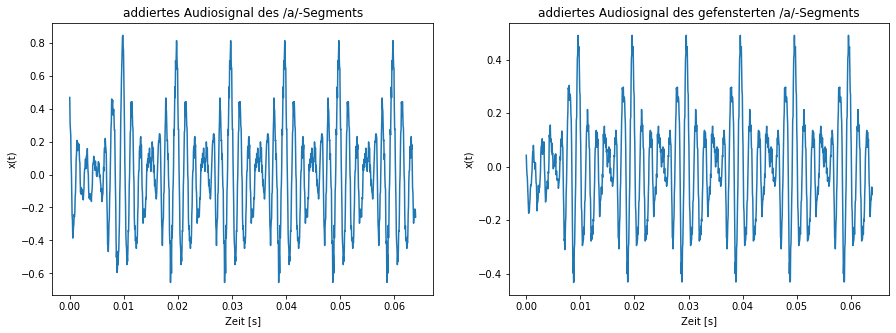

In [12]:
'''
Audioausgabe und graphische Darstellung der 
'''


T_overlap_ms = [..]         # ToDo: Geben Sie den richtigen Wert ein

playable_audio_a = [..]     # ToDo: Wenden Sie die Funktion "overlap_audio" auf a_segment an
playable_audio_a_win = [..] # ToDo: Wenden Sie die Funktion "overlap_audio" auf a_segment_win an

t_range_s = np.linspace(0, (1024-1)/fs_Hz, 1024)

# Graphische Darstellung
plt.subplot(121)
plt.title('addiertes Audiosignal des /a/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_range_s, playable_audio_a[:1024])

plt.subplot(122)
plt.title('addiertes Audiosignal des gefensterten /a/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_range_s, playable_audio_a_win[:1024])

plt.gcf().set_size_inches(15, 5)
plt.show()

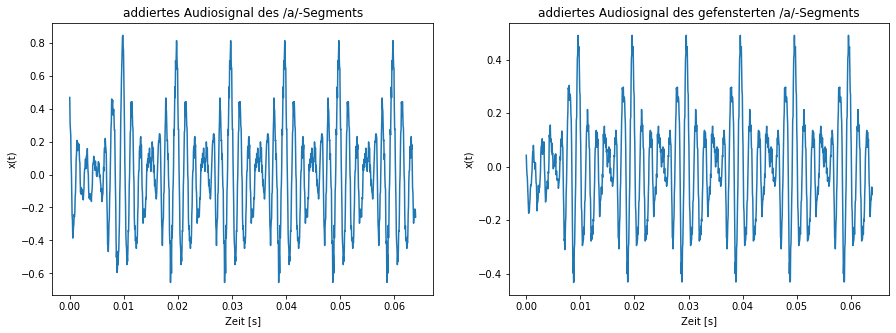

In [13]:
'''
Audioausgabe und graphische Darstellung der 
'''

# Lösung
T_overlap_ms = 10

playable_audio_a = overlap_audio(a_segment, T_overlap_ms, True)

playable_audio_a_win = overlap_audio(a_segment_win, T_overlap_ms, False)

t_range_s = np.linspace(0, (1024-1)/fs_Hz, 1024)

# Graphische Darstellung
plt.subplot(121)
plt.title('addiertes Audiosignal des /a/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_range_s, playable_audio_a[:1024])

plt.subplot(122)
plt.title('addiertes Audiosignal des gefensterten /a/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_range_s, playable_audio_a_win[:1024])

plt.gcf().set_size_inches(15, 5)
plt.show()

---

Ähnlich können Sie das Spektrum eines 32 ms langen /u/-Segments des Wortes „Akustik“ berechnen (Anfangspunkt zum Beispiel: 1,42 s). Berechnen Sie das Spektrum auch für das Von-Hann-gefensterte Segment:

In [ ]:
'''
Spektrum eines 32 ms langen /u/-Segments des Wortes „Akustik“ berechnen
''' 
# Zeitintervall bestimmen
[..]

# Audiosignal segmentieren
t_uSegment_s = [..]
u_segment = [..]

# Fenstern
u_segment_win = [..]

# Spektren berechnen
uSegment_fft_plot = [..]
uSegment_win_fft_plot = [..]

# Graphische Darstellung
plt.subplot(221)
plt.title('Audiosignal des /u/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_uSegment_s, u_segment)

plt.subplot(222)
plt.title('Amplitudenfrequenzgang des /u/-Segments')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('log|X(f)|') 
plt.plot(f_uSegment_Hz, np.log(uSegment_fft_plot))

plt.subplot(221)
plt.title('Audiosignal des gefensterten /u/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_uSegment_s, u_segment_win)

plt.subplot(222)
plt.title('Amplitudenfrequenzgang des gefensterten /u/-Segments')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('log|X(f)|') 
plt.plot(f_uSegment_Hz, np.log(uSegment_win_fft_plot))

plt.gcf().set_size_inches(15, 10)
plt.show()

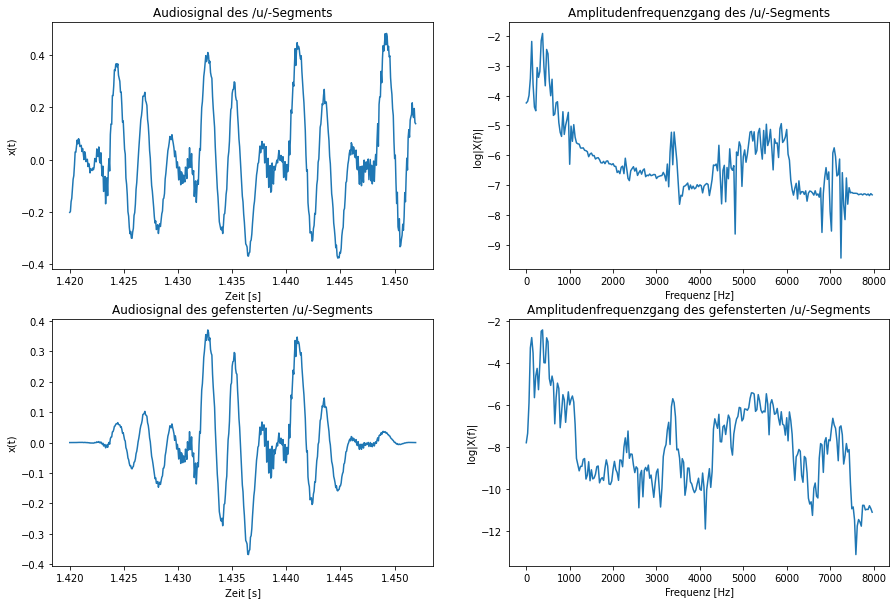

In [16]:
'''
Spektrum eines 32 ms langen /u/-Segments des Wortes „Akustik“ berechnen
''' 
# Lösung
# Zeitintervall bestimmen
n_start = int(1.42 / T_s * signalLength)  # Startsample-Nummer
n_end = n_start + 512                     # Endsample-Nummer

# Audiosignal segmentieren
t_uSegment_s = t_s[n_start:n_end]
u_segment = audioSignal[n_start:n_end]    

# Fenstern
u_segment_win = signal.hann(u_segment.size)*u_segment

# Spektrum berechnen
n_fft = 512     # Länge von FFT
f_uSegment_Hz = np.linspace(0, fs_Hz-fs_Hz/2-fs_Hz/n_fft, int(n_fft/2))   # Frequenzbereich

uSegment_fft = scipy.fftpack.fft(u_segment, n_fft)
uSegment_win_fft = scipy.fftpack.fft(u_segment_win, n_fft)
uSegment_fft_plot = np.abs(uSegment_fft[:len(f_uSegment_Hz)]) / int(n_fft/2)
uSegment_win_fft_plot = np.abs(uSegment_win_fft[:len(f_uSegment_Hz)]) / int(n_fft/2)


# Graphische Darstellung
plt.subplot(221)
plt.title('Audiosignal des /u/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_uSegment_s, u_segment)

plt.subplot(222)
plt.title('Amplitudenfrequenzgang des /u/-Segments')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('log|X(f)|') 
plt.plot(f_uSegment_Hz, np.log(uSegment_fft_plot))

plt.subplot(223)
plt.title('Audiosignal des gefensterten /u/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_uSegment_s, u_segment_win)

plt.subplot(224)
plt.title('Amplitudenfrequenzgang des gefensterten /u/-Segments')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('log|X(f)|') 
plt.plot(f_uSegment_Hz, np.log(uSegment_win_fft_plot))

plt.gcf().set_size_inches(15, 10)
plt.show()

Geben Sie sich nun auch das segmentierte Signal `u_segment` und das gefensterte Signal `u_segment_win` mit den Funktionen "repeat_audio" und "overlap_audio" (10 ms-Wiederholdauer) aus:

In [ ]:
'''
Audioausgabe repeat
'''
[..] # ToDo: wenden Sie die Funktion "repeat_audio" an, um sich "u_segment" anzuhören

In [ ]:
'''
Audioausgabe overlap
'''
T_overlap_ms = [..]

playable_audio_u = [..] # ToDo: wenden Sie die Funktion "overlap_audio" an, um sich "u_segment" und "u_segment_win" anzuhören
playable_audio_u_win = [..] 


t_range_s = np.linspace(0, (1024-1)/fs_Hz, 1024)


# Graphische Darstellung
plt.subplot(121)
plt.title('addiertes Audiosignal des /u/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_range_s, playable_audio_u[:1024])

plt.subplot(122)
plt.title('addiertes Audiosignal des gefensterten /u/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_range_s, playable_audio_u_win[:1024])

plt.gcf().set_size_inches(15, 5)
plt.show()

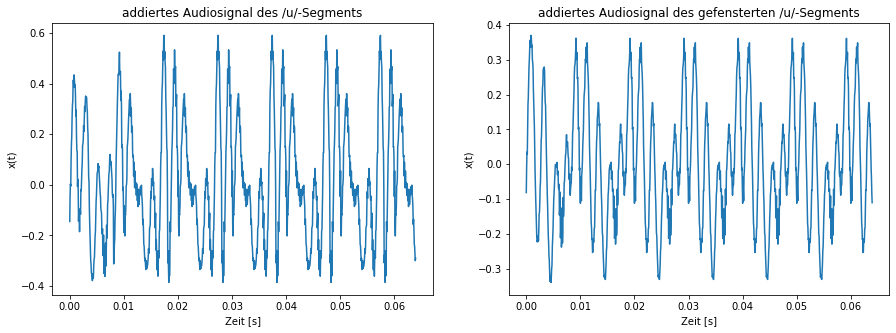

In [18]:
'''
Audioausgabe
'''
# Lösung
T_overlap_ms = 10

playable_audio_u = overlap_audio(u_segment, T_overlap_ms, True)

playable_audio_u_win = overlap_audio(u_segment_win, T_overlap_ms, False)

t_range_s = np.linspace(0, (1024-1)/fs_Hz, 1024)

# Graphische Darstellung
plt.subplot(121)
plt.title('addiertes Audiosignal des /u/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_range_s, playable_audio_u[:1024])

plt.subplot(122)
plt.title('addiertes Audiosignal des gefensterten /u/-Segments')
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_range_s, playable_audio_u_win[:1024])

plt.gcf().set_size_inches(15, 5)
plt.show()

Jetzt können wir LP-Koeffizienten berechnen, um die Pole der Systemfunktion des Synthesefilters zu bestimmen. Dafür verwenden wir nun direkt eine Funktion des Moduls `librosa`, der LP-Koeffizienten sucht: [librosa.lpc(y, order)](https://librosa.org/doc/latest/generated/librosa.lpc.html)

Dieser soll zunächst für das ungefensterte /a/-Segment "a_segment" mit einer Filterordnung der Größe N = 12 betrachtet werden.

In [ ]:
'''
Die LP-Koeffizienten des /a/-Segments berechnen und die Frequenzgang bzw. Polverteilung des Synthesefilters aufzeichnen
'''
N = [..]           # ToDo: Legen Sie die Modellordnung des Synthesefilters fest
b, a = [1], [..]   # ToDo: Bestimmen Sie die LP-Koeffizienten des Nenners über librosa.lpc()
fH_Hz, H = [..]    # ToDo: Erzeugen Sie den Amplitudenfrequenzgang mit scipy.signal.freqz()
z, p, k = [..]     # ToDo: Erzeugen Sie die Null-Pol Verteilung mi scipy.signal.tf2zpk()

# Graphische Darstellung
plt.subplot(121)
plt.title('Amplitudenfrequenzgang des Synthesefilters für /a/ mit Ordnung=%d' %N)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('$log|H(e^{jΩ})|$')
plt.plot(fH_Hz, np.log(np.abs(H)))

plt.subplot(122)
plt.title('Polverteilung des Synthesefilters mit Ordnung=%d' %N)
plt.xlabel('Real')
plt.ylabel('Image')
theta = np.arange(0, 2*np.pi, 0.01)
plt.plot(np.cos(theta), np.sin(theta), c='r', lw=0.2)  
plt.plot(np.real(p), np.imag(p), 'x')
plt.axis("equal")

plt.gcf().set_size_inches(15, 4)
plt.show()

In [ ]:
'''
Die LP-Koeffizienten des /a/-Segments berechnen und die Frequenzgang bzw. Polverteilung des Synthesefilters aufzeichnen
'''

# Lösung
N = 12                                            # Modellordnung
b, a = [1], librosa.lpc(a_segment, N)             # LP-Koeffizienten bestimmen
fH_Hz, H = scipy.signal.freqz(b, a, fs=fs_Hz)     # Amplitudenfrequenzgang
z, p, k = scipy.signal.tf2zpk(b, a)               # Null-Pol Verteilung

# Graphische Darstellung
plt.subplot(121)
plt.title('Amplitudenfrequenzgang des Synthesefilters für /a/ mit Ordnung=%d' %N)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('$log|H(e^{jΩ})|$')
plt.plot(fH_Hz, np.log(np.abs(H)))

plt.subplot(122)
plt.title('Polverteilung des Synthesefilters mit Ordnung=%d' %N)
plt.xlabel('Real')
plt.ylabel('Image')
theta = np.arange(0, 2*np.pi, 0.01)
plt.plot(np.cos(theta), np.sin(theta), c='r', lw=0.2)  
plt.plot(np.real(p), np.imag(p), 'x')
plt.axis("equal")

plt.gcf().set_size_inches(15, 4)
plt.show()

Kritisch ist dabei die Wahl der „richtigen“ Modellordnung N. Die Unterschiede im Frequenzgang bei der Wahl unterschiedlicher Modellgrößern, soll nun für das /u/-Vokal-Segment genauer betrachtet werden. Erzeugen Sie dafür mittels for-Schleife die Amplitudenfrequenzgänge bei Wahl der Synthesesfilterordnung auf 4., 8., 12., 20. und 24. Ordnung:

In [ ]:
'''
Aufgabe: Die LP-Koeffizienten des /u/-Segments mit verschiedenen Ordnungen berechnen und
          die Frequenzgang bzw. Null-Pol Verteilung des Synthesefilters aufzeichnen
'''
for N in ( [..] ):     # ToDo: Vorgabe der Filterordnungsgrößen  
    b, a = [1], [..]   # ToDo: Bestimmen Sie die LP-Koeffizienten des Nenners über librosa.lpc()
    fH_Hz, H = [..]    # ToDo: Erzeugen Sie den Amplitudenfrequenzgang mit scipy.signal.freqz()
    z, p, k = [..]     # ToDo: Erzeugen Sie die Null-Pol Verteilung mi scipy.signal.tf2zpk()

    # Graphische Darstellung
    plt.subplot(121)
    plt.title('Amplitudenfrequenzgang des Synthesefilters für /u/ mit Ordnung=%d' %N)
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('$log|H(e^{jΩ})|$')
    plt.plot(fH_Hz, np.log(np.abs(H)))
    
    plt.subplot(122)
    plt.title('Polverteilung des Synthesefilters mit Ordnung=%d' %N)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='r', lw=0.2)  
    plt.plot(np.real(p), np.imag(p), 'x')
    plt.axis("equal")
    
    plt.gcf().set_size_inches(15, 4)
    plt.show()

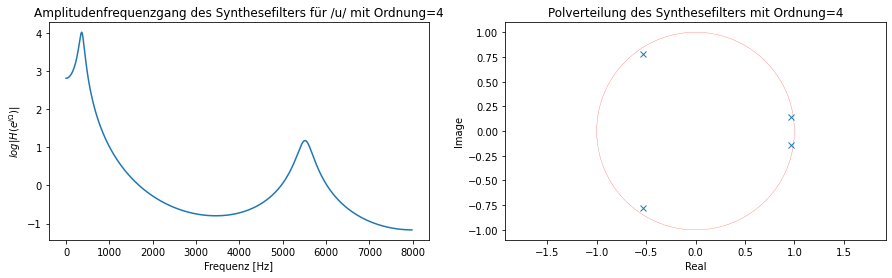

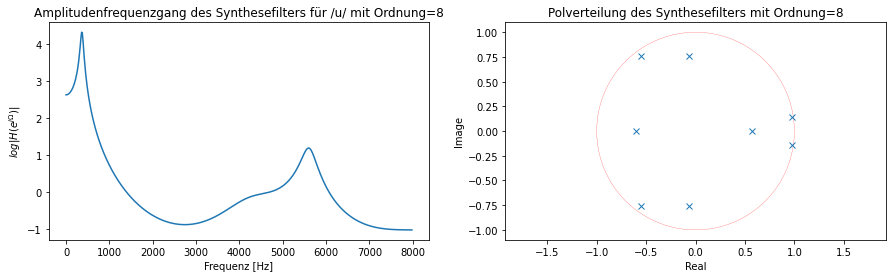

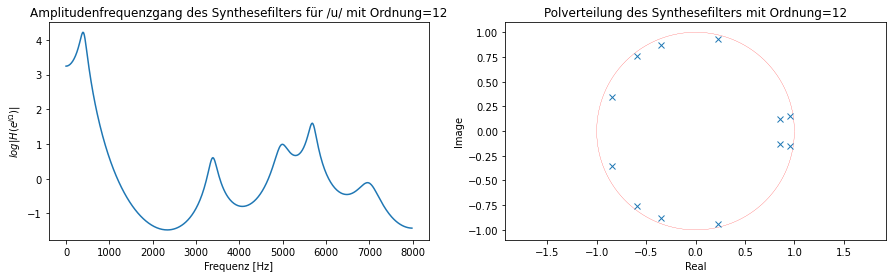

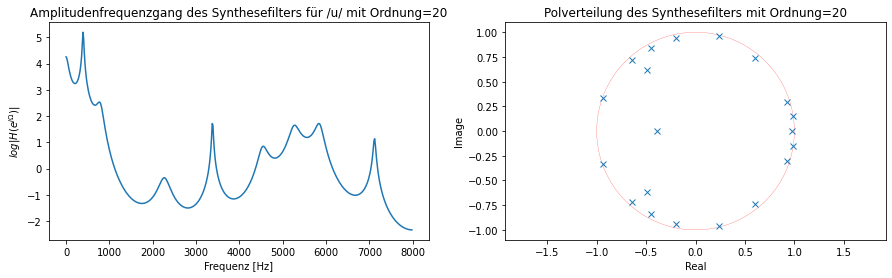

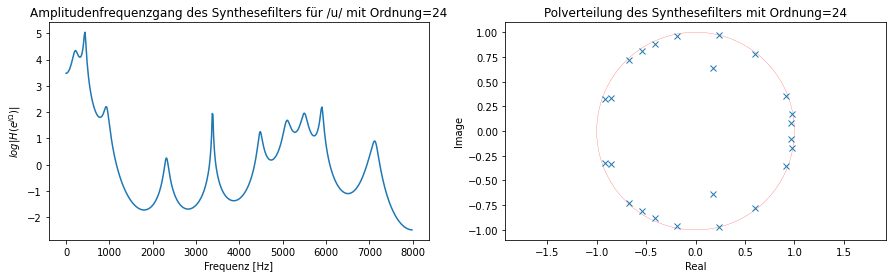

In [20]:
'''
Aufgabe: Die LP-Koeffizienten des /u/-Segments mit verschiedenen Ordnungen berechnen und
          die Frequenzgang bzw. Null-Pol Verteilung des Synthesefilters aufzeichnen
'''

# Lösung
for N in (4, 8, 12, 20, 24):  
    b, a = [1], librosa.lpc(u_segment, N)            # LP-Koeffizienten bestimmen
    fH_Hz, H = scipy.signal.freqz(b, a, fs=fs_Hz)    # Amplitudenfrequenzgang
    z, p, k = scipy.signal.tf2zpk(b, a)              # Null-Pol Verteilung

    # Graphische Darstellung
    plt.subplot(121)
    plt.title('Amplitudenfrequenzgang des Synthesefilters für /u/ mit Ordnung=%d' %N)
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('$log|H(e^{jΩ})|$')
    plt.plot(fH_Hz, np.log(np.abs(H)))
    plt.subplot(122)
    plt.title('Polverteilung des Synthesefilters mit Ordnung=%d' %N)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='r', lw=0.2)  
    plt.plot(np.real(p), np.imag(p), 'x')
    plt.axis("equal")
    plt.gcf().set_size_inches(15, 4)
    plt.show()

Um sich nun den Synthesefilter anzuhören, kann dieser invers Fouriertransformiert werden, um daraus die Impulsantwort zu erhalten:

In [ ]:
'''
Impulsantwort des modellierten /u/-Vokalfilters mit der Ordnung N = 24
'''
# Impulsantwort h des Modellfilters H
h = [..]    # ToDo: implementieren Sie eine IFFT von H mittels scipy.fftpack.ifft()
t_syn_s = np.linspace(0, (len(H)-1)/fs_Hz, len(H))

# Graphische Darstellung
plt.title('Impulsantwort des Synthesefilters für /u/ mit Ordnung=%d' %N)
plt.xlabel('Zeit [s]')
plt.ylabel('h [t]')

plt.plot(t_syn_s, np.real(h[int(len(H)):]))
plt.show()

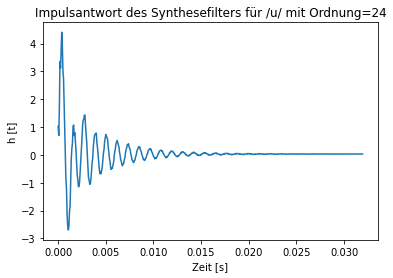

In [30]:
'''
Impulsantwort des modellierten /u/-Vokalfilters mit der Ordnung N = 24
'''

# Lösung
# Impulsantwort h des Modellfilters H
h = scipy.fftpack.ifft(H, len(H))
t_syn_s = np.linspace(0, (len(H)-1)/(fs_Hz), len(H))

# Graphische Darstellung
plt.title('Impulsantwort des Synthesefilters für /u/ mit Ordnung=%d' %N)
plt.xlabel('Zeit [s]')
plt.ylabel('h [t]')

plt.plot(t_syn_s, np.real(h))
plt.show()

Erzeugen Sie nun ein Audiosignal, indem Sie die ersten 10 ms bzw. ~170 Samples (genauer [512:512+170]) mittels der "repeat_audio" abspielen.

In [ ]:
'''
Audioausgabe
'''
[..] # ToDo: wenden Sie die Funktion "repeat_audio" an, um sich die Impulsantwort "h[512:512+170]" anzuhören.

In [ ]:
'''
Audioausgabe
'''
# Lösung
# repeat_audio(np.real(h[len(h)//2:]))
# repeat_audio(playable_audio_u)
# play_audio(playable_audio)

Zum Schluss soll nun mittels `interact_manual` Änderungen in der Modellordnung  betrachtet werden:

In [ ]:
'''
Interaktive LPC-Darstellung
'''

@interact_manual(N_i=(2, 50, 2),  segment_type_i=[('a-Segment', 1), ('u-Segment', 2)], output_sound_i = True, output_type_i=[('real', 1), ('real+win', 2),('real+win+overlap', 3),('syn+uncut', 4), ('syn+overlap', 5)], t_overlap_ms_i = (1, 15, 1))
def interactive_linear_sweep(N_i=10, segment_type_i = 'a-Segment', output_sound_i=True, output_type_i = 'win+added', t_overlap_ms_i = 10):
    if segment_type_i == 1:
        segment = a_segment
    elif segment_type_i == 2:
        segment = u_segment
    
    # Berechnung der LP-Koeffizienten
    b, a = [..]
    
    # Bestimmung des Amplitudenfrequenzgang und der Pol-Nullstellen-Verteilung
    fH_Hz, H = [..]
    z, p, k = [..]
    
    # Impulsantwort h des Modellfilters H
    h = [..]
    t_s = [..]
    
    # Audioauswahl
    if output_type_i == 1:  # real + uncut
        chosen_audio = repeat_audio( [..] )          
    elif output_type_i == 2: # real + windowed
        chosen_audio = repeat_audio( [..] )
    elif output_type_i == 3: # real + windowed + overlap
        chosen_audio = overlap_audio( [..] )
    elif output_type_i == 4: # syn + uncut
        chosen_audio = repeat_audio( [..] )       
    elif output_type_i == 5: # syn + overlap
        chosen_audio = overlap_audio( [..] )
    
    # Graphische Darstellung
    plt.subplot(221)
    plt.title('Amplitudenfrequenzgang des Synthesefilters mit Ordnung=%d' %N_i)
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('$log|H(e^{jΩ})|$')
    plt.plot(fH_Hz, np.log(np.abs(H)))
    plt.subplot(222)
    plt.title('Polverteilung des Synthesefilters mit Ordnung=%d' %N_i)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='r', lw=0.2)  
    plt.plot(np.real(p), np.imag(p), 'x')
    plt.axis("equal")
    plt.gcf().set_size_inches(15, 4)
    plt.subplot(212)
    plt.title('Impulsantwort des Synthesefilters mit Ordnung=%d' %N_i)
    plt.xlabel('Zeit [s]')
    plt.ylabel('h [t]')
    plt.plot(t_s[0:170], np.real(h[int(len(H)):int(len(H))+170]))
    plt.gcf().set_size_inches(20, 10)
    plt.show()

    
    # Graphische Darstellung
    plt.subplot(221)
    plt.title('Amplitudenfrequenzgang des Synthesefilters mit Ordnung=%d' %N_i)
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('$log|H(e^{jΩ})|$')
    plt.plot(fH_Hz, np.log(np.abs(H)))
    
    plt.subplot(222)
    plt.title('Polverteilung des Synthesefilters mit Ordnung=%d' %N_i)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='r', lw=0.2)  
    plt.plot(np.real(p), np.imag(p), 'x')
    plt.axis("equal")
    plt.gcf().set_size_inches(15, 4)
    
    plt.subplot(223)
    plt.title('Impulsantwort des Synthesefilters mit Ordnung=%d' %N_i)
    plt.xlabel('Zeit [s]')
    plt.ylabel('h [t]')
    plt.plot(t_s, np.real(h))
    
    plt.subplot(224)
    plt.title('Ausschnitt des Audiosignals')
    plt.xlabel('Zeit [s]')
    plt.ylabel('x [t]')
    plt.plot(t_s, chosen_audio[:512])
    plt.gcf().set_size_inches(20, 10)
    plt.show()

    # Audioausgabe
    if output_sound_i == True:
        play_audio(chosen_audio)


In [33]:
'''
Interaktive LPC-Darstellung
'''
# Lösung

@interact_manual(N_i=(2, 50, 2),  segment_type_i=[('a-Segment', 1), ('u-Segment', 2)], output_sound_i = True, output_type_i=[('real', 1), ('real+win', 2),('real+win+overlap', 3),('syn+uncut', 4), ('syn+overlap', 5)], t_overlap_ms_i = (1, 15, 1))
def interactive_linear_sweep(N_i=10, segment_type_i = 'a-Segment', output_sound_i=True, output_type_i = 'win+added', t_overlap_ms_i = 10):
    if segment_type_i == 1:
        segment = a_segment
    elif segment_type_i == 2:
        segment = u_segment
    
    # LP-Koeffizienten 
    b, a = [1], librosa.lpc(segment, N_i)            # LP-Koeffizienten bestimmen
    fH_Hz, H = scipy.signal.freqz(b, a, fs=fs_Hz)    # Amplitudenfrequenzgang
    z, p, k = scipy.signal.tf2zpk(b, a)              # Null-Pol Verteilung
    
    # Impulsantwort h des Modellfilters H
    h = scipy.fftpack.ifft(H, 512)
    t_s = t_s = np.linspace(0, len(H)/fs_Hz, len(H))
    
   
    # Audioauswahl
    if output_type_i == 1:  # real + uncut
        chosen_audio = repeat_audio(segment, False)          
    elif output_type_i == 2: # real + windowed
        chosen_audio = repeat_audio(segment*signal.hann(segment.size), False)
    elif output_type_i == 3: # real + windowed + overlap
        chosen_audio = overlap_audio(segment*signal.hann(segment.size), t_overlap_ms_i, False)
    elif output_type_i == 4: # syn + uncut
        chosen_audio = repeat_audio(np.real(h), False)        
    elif output_type_i == 5: # syn + overlap
        chosen_audio = overlap_audio(np.real(h), t_overlap_ms_i, False)

    # Graphische Darstellung
    plt.subplot(221)
    plt.title('Amplitudenfrequenzgang des Synthesefilters mit Ordnung=%d' %N_i)
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('$log|H(e^{jΩ})|$')
    plt.plot(fH_Hz, np.log(np.abs(H)))
    
    plt.subplot(222)
    plt.title('Polverteilung des Synthesefilters mit Ordnung=%d' %N_i)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='r', lw=0.2)  
    plt.plot(np.real(p), np.imag(p), 'x')
    plt.axis("equal")
    plt.gcf().set_size_inches(15, 4)
    
    plt.subplot(223)
    plt.title('Impulsantwort des Synthesefilters mit Ordnung=%d' %N_i)
    plt.xlabel('Zeit [s]')
    plt.ylabel('h [t]')
    plt.plot(t_s, np.real(h))
    
    plt.subplot(224)
    plt.title('Ausschnitt des Audiosignals')
    plt.xlabel('Zeit [s]')
    plt.ylabel('x [t]')
    plt.plot(t_s, chosen_audio[:512])
    plt.gcf().set_size_inches(20, 10)
    plt.show()

    # Audioausgabe
    if output_sound_i == True:
        play_audio(chosen_audio)

interactive(children=(IntSlider(value=10, description='N_i', max=50, min=2, step=2), Dropdown(description='seg…

Dies ist nur eine rudimentäre Umsetzung eines synthetisierten Vokaltrakts, zum Beispiel "Pitch Synchronous Overlap Add (PSOLA)". Auf diese wird aber in der Vorlesung "Sprachsynthese" im 9. Semester näher eingegangen. 

In [ ]:
sa.stop_all()

----

### References

1. Titelbild von [Justin Stoltzfus](https://www.dataversity.net/voice-processing-are-we-near-new-speech-recognition-apps/#), [Emflazie](https://en.wikipedia.org/wiki/Source%E2%80%93filter_model#/media/File:Source-filter_model_diagram.svg), [adaptivedigital](https://www.adaptivedigital.com/lpc/)   
2. [Linear predictive coding](https://en.wikipedia.org/wiki/Linear_predictive_coding)
3. [Introduction - Linear predictive coding](http://support.ircam.fr/docs/AudioSculpt/3.0/co/LPC.html)  
---
<div>Notebook erstellt von Arne-Lukas Fietkau, Yifei Li  und <a href="mailto:christoph.wagner@tu-dresden.de?Subject=Frage%20zu%20Jupyter%20Notebook%201.2%20IIR%20Filterentwurf" target="_top">Christoph Wagner</a></div>